In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Data COllection and EDA

In [2]:
fullfillment_data=pd.read_csv("fulfilment_center_info.csv")
print(fullfillment_data.head())
fullfillment_data.shape

   center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6


(77, 5)

In [3]:
len(fullfillment_data['op_area'].unique()) # Operatinal area count is 30
len(fullfillment_data['center_type'].unique()) # only 3 types of centers
len(fullfillment_data['city_code'].unique()) # 51 city codes
len(fullfillment_data['center_type'].unique())

3

In [4]:
meal_data=pd.read_csv("meal_info.csv")
print(meal_data.head())
meal_data.shape
len(meal_data["cuisine"].unique()) # number of cuisines is only 4
len(meal_data["category"].unique()) # number of category is only 14
meal_data

   meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [5]:
train_data=pd.read_csv("train.csv")
print(train_data.shape)
train_data.head()


(456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
train_data["emailer_for_promotion"].unique() # checking unique values to confirm that its a yes or no column
train_data["homepage_featured"].unique()
train_data["meal_id"].unique() # there seems to be only fixed number of type of meals= 51
train_data["center_id"].unique() # same goes for number centers = 77
train_data["week"].unique() # there seems to be 145 weeks total

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145])

In [7]:
test_data=pd.read_csv("test_QoiMO9B.csv")
print(test_data.head())
test_data.shape

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  


(32573, 8)

In [8]:
test_data["week"].unique()

array([146, 147, 148, 149, 150, 151, 152, 153, 154, 155])

Upon inspection of type and nature of data, it seems evident that in the training and testing data, meal_id and center_id serves no purpose when it comes to training/testing model. But replacing them with columns category and cuisine from meal table and columns op_area from center table seems logical

In [9]:
X=train_data.copy()
X['cuisine']=''
X['category']=''
X['op_area']=''

In [10]:
X['cuisine'] = X['meal_id'].map(meal_data.set_index('meal_id')['cuisine']).fillna(X['cuisine']) # new column cuisine has been added by mapping it to meal_id
X['category'] = X['meal_id'].map(meal_data.set_index('meal_id')['category']).fillna(X['category']) # new column category has been added by mapping it to meal_id
X['op_area']=X['center_id'].map(fullfillment_data.set_index('center_id')['op_area']).fillna(X['op_area']) # new column op_area has been added by mapping it to center_id


In [11]:
X.drop(['meal_id','center_id','id'],axis=1,inplace=True) # dropping ID representing columns
X

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,cuisine,category,op_area
0,1,136.83,152.29,0,0,177,Thai,Beverages,2.0
1,1,136.83,135.83,0,0,270,Thai,Beverages,2.0
2,1,134.86,135.86,0,0,189,Thai,Beverages,2.0
3,1,339.50,437.53,0,0,54,Indian,Beverages,2.0
4,1,243.50,242.50,0,0,40,Indian,Beverages,2.0
...,...,...,...,...,...,...,...,...,...
456543,145,484.09,484.09,0,0,68,Indian,Desert,4.5
456544,145,482.09,482.09,0,0,42,Indian,Desert,4.5
456545,145,237.68,321.07,0,0,501,Italian,Salad,4.5
456546,145,243.50,313.34,0,0,729,Italian,Salad,4.5


In [12]:
# performing the same for testing data
y=test_data.copy()
y['cuisine']=''
y['category']=''
y['op_area']=''

y['cuisine'] = y['meal_id'].map(meal_data.set_index('meal_id')['cuisine']).fillna(y['cuisine']) # new column cuisine has been added by mapping it to meal_id
y['category'] = y['meal_id'].map(meal_data.set_index('meal_id')['category']).fillna(y['category']) # new column category has been added by mapping it to meal_id
y['op_area']=y['center_id'].map(fullfillment_data.set_index('center_id')['op_area']).fillna(y['op_area']) # new column op_area has been added by mapping it to center_id

y.drop(['meal_id','center_id','id'],axis=1,inplace=True) # dropping ID representing columns

y

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,category,op_area
0,146,158.11,159.11,0,0,Thai,Beverages,2.0
1,146,160.11,159.11,0,0,Thai,Beverages,2.0
2,146,157.14,159.14,0,0,Thai,Beverages,2.0
3,146,162.02,162.02,0,0,Indian,Beverages,2.0
4,146,163.93,163.93,0,0,Indian,Beverages,2.0
...,...,...,...,...,...,...,...,...
32568,155,482.09,484.09,0,0,Indian,Desert,4.5
32569,155,483.09,483.09,0,0,Indian,Desert,4.5
32570,155,322.07,323.07,0,0,Italian,Salad,4.5
32571,155,322.07,323.07,0,0,Italian,Salad,4.5


## Now our Training Data and Testing Data has been properly dress through using provided tables and details, lets move on to data cleaning and preprocessing

### Checking null values and duplication

In [13]:
print(" X \n",X.isna().sum())
print("\n y \n",y.isna().sum())
# there is no null value of row duplication

 X 
 week                     0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
cuisine                  0
category                 0
op_area                  0
dtype: int64

 y 
 week                     0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
cuisine                  0
category                 0
op_area                  0
dtype: int64


In [14]:
# checking description and info of data X and y
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   checkout_price         456548 non-null  float64
 2   base_price             456548 non-null  float64
 3   emailer_for_promotion  456548 non-null  int64  
 4   homepage_featured      456548 non-null  int64  
 5   num_orders             456548 non-null  int64  
 6   cuisine                456548 non-null  object 
 7   category               456548 non-null  object 
 8   op_area                456548 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 31.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   week                  

In [15]:
X.describe()
# abonormality observed in target num_orders

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000
mean,74.768771,332.238933,354.156627,0.081152,0.10920,261.872760,4.083590
std,41.524956,152.939723,160.715914,0.273069,0.31189,395.922798,1.091686
min,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000,0.900000
25%,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000,3.600000
50%,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000,4.000000
75%,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000,4.500000
max,145.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,7.000000


In [16]:
y.describe()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area
count,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,150.477819,341.854440,356.493615,0.066435,0.081356,4.087726
std,2.864072,153.893886,155.150101,0.249045,0.273385,1.098835
min,146.000000,67.900000,89.240000,0.000000,0.000000,0.900000
25%,148.000000,214.430000,243.500000,0.000000,0.000000,3.600000
50%,150.000000,320.130000,321.130000,0.000000,0.000000,4.000000
75%,153.000000,446.230000,455.930000,0.000000,0.000000,4.500000
max,155.000000,1113.620000,1112.620000,1.000000,1.000000,7.000000


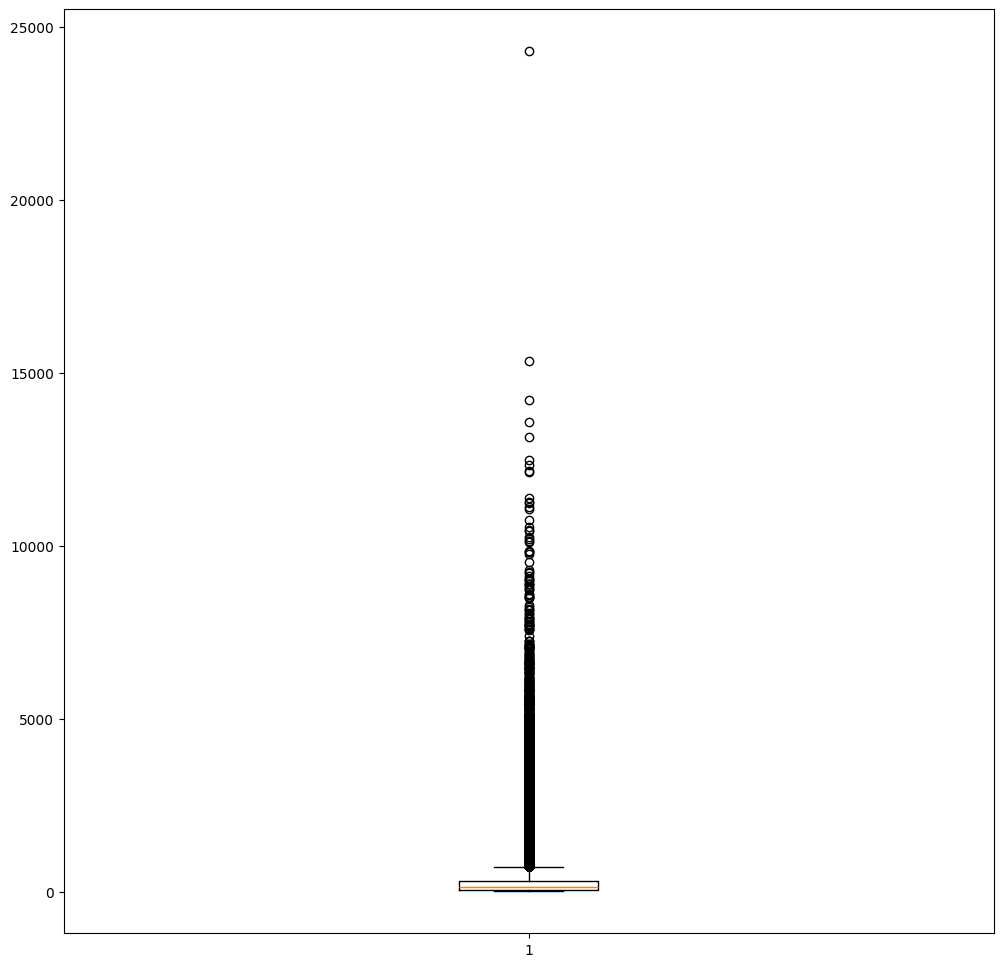

In [17]:
# investigating num_order
len(X['num_orders'].unique()) # since there seems to be 1250 unique values, boxplot will help understand abnormality
plt.figure(figsize=(12,12))
plt.boxplot(X['num_orders'])
plt.show()

### since it is not evident as to from what value are the outliers present, to count them lets take the Q3 value as the boundary beyond which all are outliers

In [18]:
q1=X['num_orders'].quantile(0.25)
q3=X['num_orders'].quantile(0.75)
iqr=q3-q1
upper_bound= q3+ 1.5*iqr
upper_bound

729.0

In [19]:
# thus taking 729 as the maximum value of num_orders, lets check again for outliers
X['num_orders'][X['num_orders']>upper_bound].unique()
# since it is num of orders , lets check other features' values for these abnormal sales count
X[X['num_orders']>upper_bound] # there are a total of 32937 rows of data with target as an outlier- 7.2% of entire training data

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,cuisine,category,op_area
10,1,323.01,390.00,0,1,823,Continental,Beverages,2.0
11,1,322.07,388.00,0,1,972,Continental,Beverages,2.0
14,1,264.84,297.79,1,0,756,Indian,Rice Bowl,2.0
20,1,259.99,320.13,1,1,798,Italian,Sandwich,2.0
33,1,136.83,136.83,0,0,1498,Thai,Beverages,3.6
...,...,...,...,...,...,...,...,...,...
456326,145,239.59,338.56,0,1,755,Italian,Salad,3.9
456457,145,159.14,158.14,0,0,1188,Thai,Beverages,7.0
456465,145,227.01,227.01,0,0,755,Italian,Beverages,7.0
456471,145,301.73,300.73,0,0,851,Indian,Rice Bowl,7.0


### from the boxplot we can see that there exit number of order per week as high as 24300. which means there is a center that did 24300/7=3471 sales a day, 230 order an hour i.e approximately 3 orders a minute  and maintained this for a week assuming the restaurant stayed active for 15 hours a day

In [20]:
len(X[X['num_orders']>5000])
# here it seems data with num_orders above 5k a week is only 263 which makes 0.06 percent of the data. and 5000 order a week ~ 700 orders a day seems feasible .
# thus assuming values above 5000 as abnormalities in a trend we will remove them by clipping

263

In [21]:
X['num_orders']=X['num_orders'].clip(upper=5000)
X.describe()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000
mean,74.768771,332.238933,354.156627,0.081152,0.10920,260.740551,4.083590
std,41.524956,152.939723,160.715914,0.273069,0.31189,375.692728,1.091686
min,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000,0.900000
25%,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000,3.600000
50%,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000,4.000000
75%,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000,4.500000
max,145.000000,866.270000,866.270000,1.000000,1.00000,5000.000000,7.000000


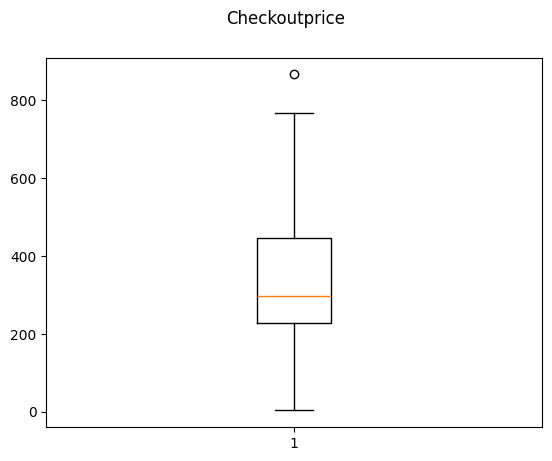

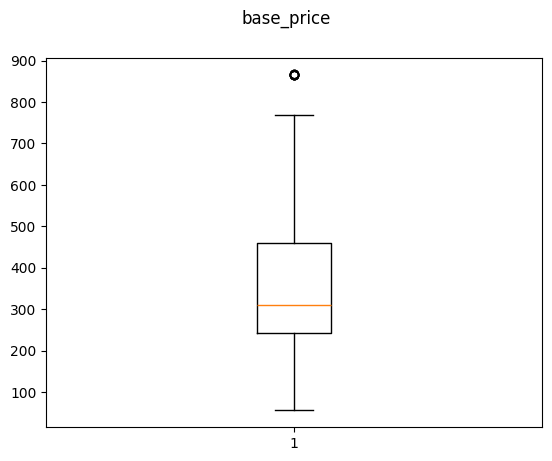

In [22]:
plt.boxplot(X['checkout_price'])
plt.suptitle("Checkoutprice")
plt.show()

plt.boxplot(X['base_price'])
plt.suptitle("base_price")
plt.show()


In [23]:
# since there seems to not be much outlier problems with the features, lets move on to preprocessing

In [24]:
target=X['num_orders']
X.drop('num_orders',axis=1,inplace=True)


In [25]:
X

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,category,op_area
0,1,136.83,152.29,0,0,Thai,Beverages,2.0
1,1,136.83,135.83,0,0,Thai,Beverages,2.0
2,1,134.86,135.86,0,0,Thai,Beverages,2.0
3,1,339.50,437.53,0,0,Indian,Beverages,2.0
4,1,243.50,242.50,0,0,Indian,Beverages,2.0
...,...,...,...,...,...,...,...,...
456543,145,484.09,484.09,0,0,Indian,Desert,4.5
456544,145,482.09,482.09,0,0,Indian,Desert,4.5
456545,145,237.68,321.07,0,0,Italian,Salad,4.5
456546,145,243.50,313.34,0,0,Italian,Salad,4.5


# Preprocessing

> Here columns other than base price and checkout price are all categorical columns. Out of these we wont be encoding op_area and week as they are already in a numerical form that carries weight with increasing number. For cuisine and category, we will use one hot encoding . emailer_for_promotion and homepage_featured are already label encoded
> Base price and checkoutprice are numerical values that will be scaled based on their  distribution

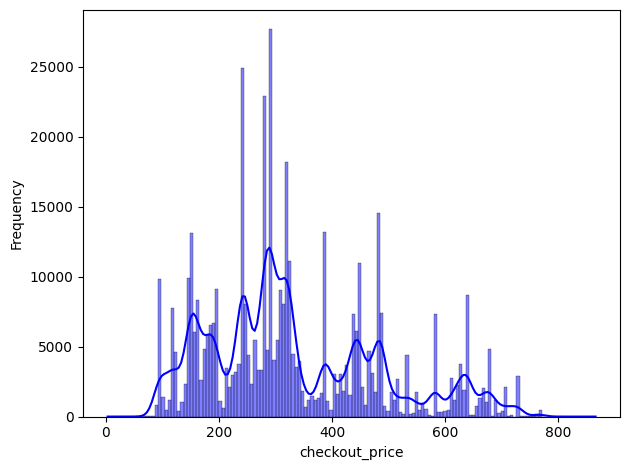

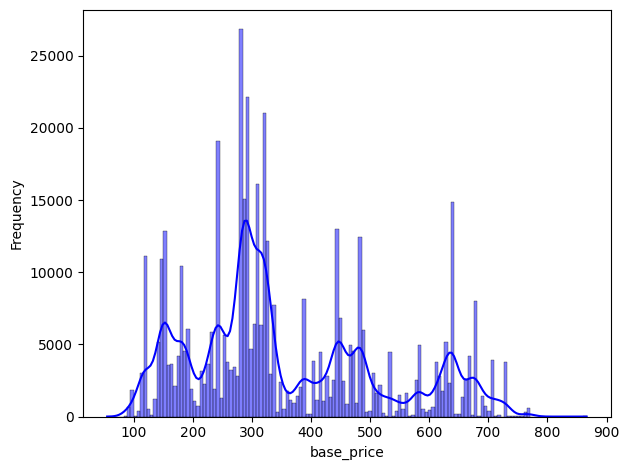

In [26]:
sns.histplot(X['checkout_price'], kde=True, color='blue')
plt.xlabel('checkout_price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

sns.histplot(X['base_price'], kde=True, color='blue')
plt.xlabel('base_price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

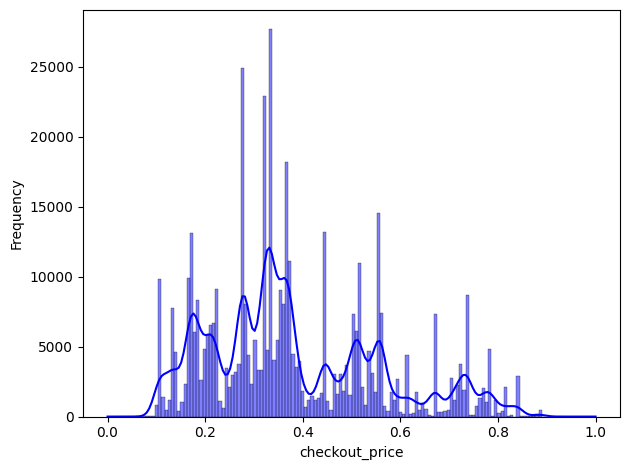

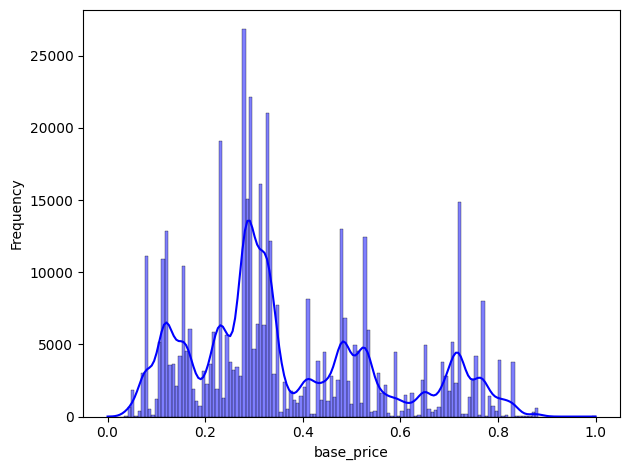

In [27]:
# based on the distribution , I chose minmax scaling
mm=MinMaxScaler()
X['checkout_price']=mm.fit_transform(X['checkout_price'].values.reshape(-1,1))
X['base_price']=mm.fit_transform(X['base_price'].values.reshape(-1,1))
sns.histplot(X['checkout_price'], kde=True, color='blue')
plt.xlabel('checkout_price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

sns.histplot(X['base_price'], kde=True, color='blue')
plt.xlabel('base_price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [28]:
# similarly encode y
y['checkout_price']=mm.transform(y['checkout_price'].values.reshape(-1,1))
y['base_price']=mm.transform(y['base_price'].values.reshape(-1,1))
y

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,cuisine,category,op_area
0,146,0.126720,0.127953,0,0,Thai,Beverages,2.0
1,146,0.129187,0.127953,0,0,Thai,Beverages,2.0
2,146,0.125524,0.127990,0,0,Thai,Beverages,2.0
3,146,0.131542,0.131542,0,0,Indian,Beverages,2.0
4,146,0.133897,0.133897,0,0,Indian,Beverages,2.0
...,...,...,...,...,...,...,...,...
32568,155,0.526242,0.528708,0,0,Indian,Desert,4.5
32569,155,0.527475,0.527475,0,0,Indian,Desert,4.5
32570,155,0.328910,0.330144,0,0,Italian,Salad,4.5
32571,155,0.328910,0.330144,0,0,Italian,Salad,4.5


In [29]:
# Now that numerical data has been scaled, lets encode categoricald data

X=pd.get_dummies(X,columns=['cuisine', 'category'],dtype=int)
X

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,...,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,1,0.155056,0.119543,0,0,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0.155056,0.099245,0,0,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0.152774,0.099282,0,0,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.389818,0.471292,0,0,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.278617,0.230787,0,0,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,0.557303,0.528708,0,0,4.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
456544,145,0.554987,0.526242,0,0,4.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
456545,145,0.271875,0.327677,0,0,4.5,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
456546,145,0.278617,0.318145,0,0,4.5,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   456548 non-null  int64  
 1   checkout_price         456548 non-null  float64
 2   base_price             456548 non-null  float64
 3   emailer_for_promotion  456548 non-null  int64  
 4   homepage_featured      456548 non-null  int64  
 5   op_area                456548 non-null  float64
 6   cuisine_Continental    456548 non-null  int64  
 7   cuisine_Indian         456548 non-null  int64  
 8   cuisine_Italian        456548 non-null  int64  
 9   cuisine_Thai           456548 non-null  int64  
 10  category_Beverages     456548 non-null  int64  
 11  category_Biryani       456548 non-null  int64  
 12  category_Desert        456548 non-null  int64  
 13  category_Extras        456548 non-null  int64  
 14  category_Fish          456548 non-nu

In [36]:
# similarly encode y
y=pd.get_dummies(y,columns=['cuisine', 'category'],dtype=int)
y

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,...,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters
0,146,0.126720,0.127953,0,0,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,146,0.129187,0.127953,0,0,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,146,0.125524,0.127990,0,0,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,146,0.131542,0.131542,0,0,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,146,0.133897,0.133897,0,0,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,155,0.526242,0.528708,0,0,4.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32569,155,0.527475,0.527475,0,0,4.5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32570,155,0.328910,0.330144,0,0,4.5,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32571,155,0.328910,0.330144,0,0,4.5,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


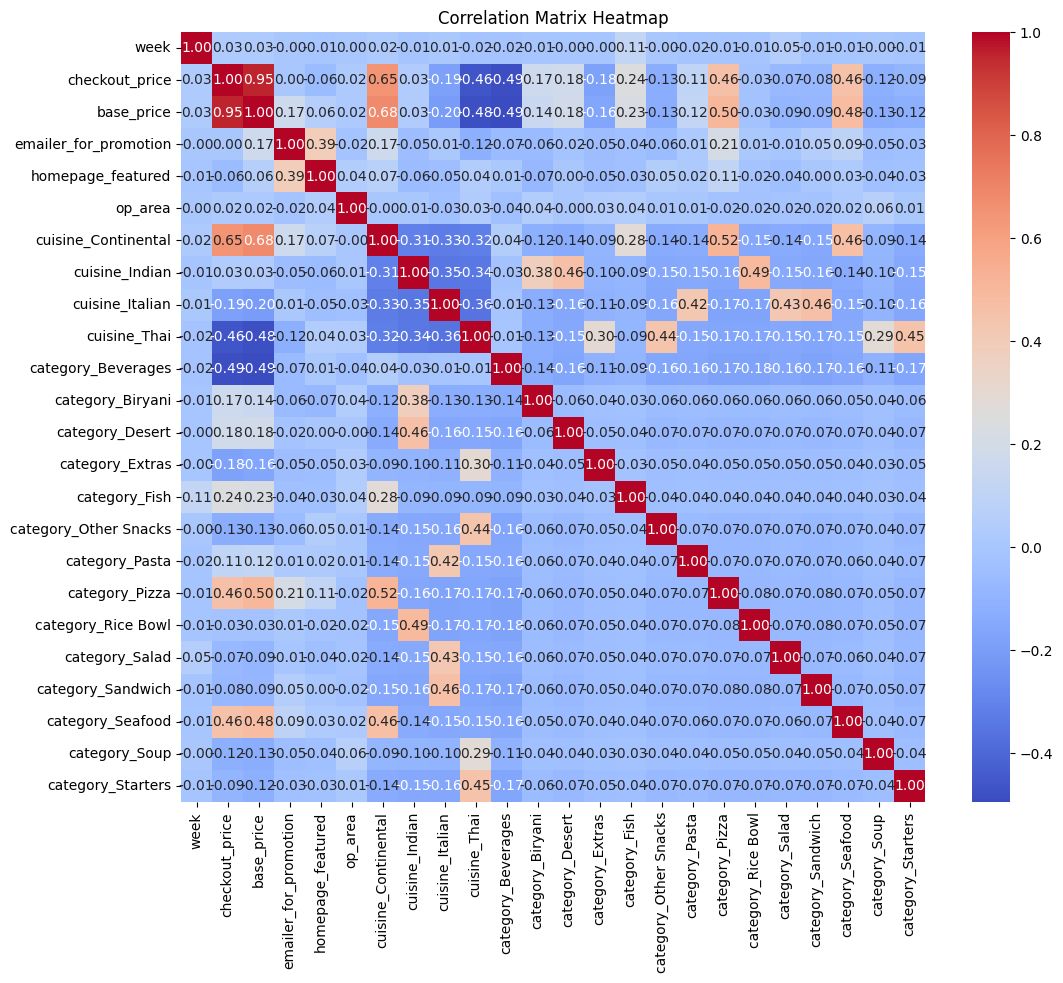

In [37]:
# lets check the correlation of the training data
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


#### Splitting the data for training

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(365238, 24)
(91310, 24)
(365238,)
(91310,)


# Model Creation and prediction

In [50]:
# let us perform hyperparameter tuning using randomserachCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None],
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    cv=2,       # 3-fold cross-validation
    verbose=2,
    n_jobs=-1   # Use all processors
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Evaluate on test set
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best_rf) * 100:.2f}%")


Fitting 2 folds for each of 50 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
rf1 = RandomForestRegressor(n_estimators=200,
                          max_features='sqrt',
                          min_samples_split=4,
                          min_samples_leaf=2,
                          criterion='squared_error',
                           max_depth=7,
                          random_state=42)

rf1.fit(X_train,y_train)

y_pred=rf1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 58876.91
R^2 Score: 0.58


In [ ]:
rf2 = RandomForestRegressor(n_estimators=200,
                          max_features='sqrt',
                          min_samples_split=4,
                          min_samples_leaf=2,
                          criterion='squared_error',
                           max_depth=4,
                          random_state=42)

rf2.fit(X_train,y_train)

y_pred=rf2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 84152.27
R^2 Score: 0.40


In [ ]:
rf3 = RandomForestRegressor(n_estimators=100,
                          max_features='sqrt',
                          min_samples_split=4,
                          min_samples_leaf=2,
                          criterion='squared_error',
                          random_state=42)

rf3.fit(X_train,y_train)

y_pred=rf3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

In [39]:
rf4 = RandomForestRegressor(n_estimators=100,
                          max_features='sqrt',
                          min_samples_split=4,
                          min_samples_leaf=2,
                          criterion='squared_error',
                          random_state=42)

rf4.fit(X_train,y_train)

y_pred=rf4.predict(X_test)

In [40]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 30132.18
R^2 Score: 0.78


In [51]:
from sklearn.metrics import mean_squared_log_error
rmsle=np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE Score: {rmsle*100}")

RMSLE Score: 60.741263317085526


In [43]:
# since we got maximum r2 in model rf4, lets use that to predict num_orders of test data
#rf4.fit(X,target)
test_data_predictions=rf4.predict(y)


In [44]:
output=pd.DataFrame(test_data['id'],columns=['id'])
output["num_orders"]=np.round(test_data_predictions,0)
output

,id,num_orders
0,1028232,197.0
1,1127204,197.0
2,1212707,194.0
3,1082698,95.0
4,1400926,92.0
...,...,...
32568,1250239,61.0
32569,1039516,69.0
32570,1158107,307.0
32571,1444235,307.0


In [49]:
output.to_csv("output1.csv",index=False)